<a href="https://colab.research.google.com/github/Cill19/Obesity-Classification-using-Random-Forest/blob/main/Prediksi_Tingkat_Obesitas_Berdasarkan_Kebiasaan_Makan_dan_Kondisi_Fisik_Menggunakan_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Klasifikasi Obesitas Menggunakan Random Forest**
**Tujuan Proyek**

Tujuan dari proyek ini adalah untuk membangun model prediksi yang akurat dalam mengklasifikasikan tingkat obesitas individu berdasarkan kebiasaan makan, aktivitas fisik, dan kondisi fisik mereka. Dengan menggunakan algoritma Random Forest, proyek ini bertujuan untuk memahami hubungan antara kebiasaan hidup dan tingkat obesitas, serta menyediakan alat prediktif yang dapat mendukung upaya pencegahan obesitas. Hasil dari proyek ini diharapkan dapat memberikan wawasan yang bermanfaat bagi komunitas medis, ahli gizi, dan pembuat kebijakan untuk meningkatkan kesadaran kesehatan dan merancang intervensi yang lebih efektif.

# **Data Understanding**
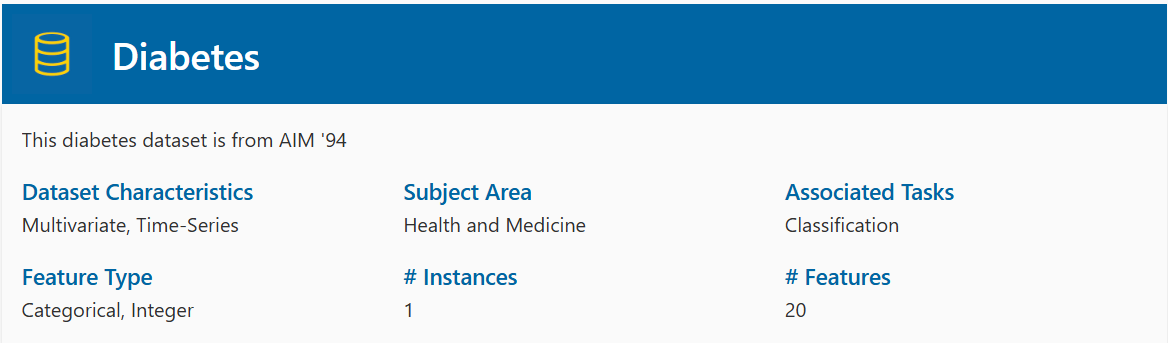

In [33]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo

# Install dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Load dataset
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

Dataset "Estimation of Obesity Levels Based on Eating Habits and Physical Condition" berisi data tentang kebiasaan makan dan kondisi fisik individu dari Meksiko, Peru, dan Kolombia. Data ini mencakup 2111 sampel dengan 16 fitur seperti jenis kelamin, usia, tinggi badan, berat badan, kebiasaan makan, aktivitas fisik, dan kebiasaan lainnya. Tujuan utama dari dataset ini adalah untuk mengklasifikasikan tingkat obesitas individu ke dalam beberapa kategori, termasuk Insufficient Weight, Normal Weight, Overweight Level I & II, dan berbagai tipe obesitas (Obesity Type I, II, dan III). Dataset ini menggabungkan data nyata (23%) yang dikumpulkan melalui platform web dan data sintetis (77%) yang dihasilkan menggunakan alat Weka dan filter SMOTE. Dataset ini memberikan peluang untuk melakukan analisis klasifikasi menggunakan machine learning untuk mendukung aplikasi di bidang kesehatan, seperti deteksi dini obesitas dan penyusunan program intervensi kesehatan.

In [34]:
# Ubah y menjadi array 1 dimensi jika berbentuk 2 dimensi
y_flat = y.values.ravel() if hasattr(y, 'values') else np.ravel(y)

# Pastikan y diubah menjadi pandas.Series dan diberi nama
y_series = pd.Series(y_flat, name='ObesityLevel')

# Menggabungkan fitur (X) dan target (y) untuk inspeksi awal
data = pd.concat([X, y_series], axis=1)

# Menampilkan 5 baris pertama dari dataset
print(data.head())

# Menampilkan informasi umum tentang dataset
print(data.info())

# Menampilkan statistik deskriptif untuk data numerik
print(data.describe())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS         ObesityLevel  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Dataset ini berisi 2111 sampel dengan 17 fitur yang mencakup karakteristik individu seperti jenis kelamin (Gender), usia (Age), tinggi badan (Height), berat badan (Weight), serta kebiasaan makan dan aktivitas fisik seperti konsumsi makanan tinggi kalori (FAVC), jumlah konsumsi air (CH2O), frekuensi aktivitas fisik (FAF), dan waktu penggunaan teknologi (TUE). Kolom target, ObesityLevel, mengklasifikasikan tingkat obesitas menjadi beberapa kategori, seperti Normal Weight, Overweight Levels, dan Obesity Types.

Analisis awal menunjukkan distribusi variabel numerik, di mana rata-rata usia adalah sekitar 24,3 tahun dengan kisaran usia 14 hingga 61 tahun. Tinggi badan rata-rata adalah 1,70 meter, dan berat badan rata-rata mencapai 86,6 kg. Frekuensi konsumsi sayur (FCVC) dan air (CH2O) memiliki rata-rata masing-masing 2,4 kali dan 2 liter per hari. Data ini memberikan gambaran lengkap tentang pola makan, aktivitas fisik, dan kebiasaan gaya hidup individu, yang semuanya berkontribusi dalam memprediksi tingkat obesitas. Tidak terdapat nilai yang hilang dalam dataset, menunjukkan dataset ini sudah siap untuk analisis lebih lanjut.








# **Data Preprocessing**

In [35]:
# Cek missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
ObesityLevel                      0
dtype: int64


Hasil pemeriksaan terhadap missing values dalam dataset menunjukkan bahwa tidak ada nilai yang hilang pada setiap kolom. Seluruh 2111 sampel memiliki data yang lengkap untuk semua 17 fitur, termasuk fitur numerik seperti Age, Height, dan Weight, serta fitur kategorikal seperti Gender, family_history_with_overweight, dan ObesityLevel. Ketiadaan nilai yang hilang memastikan bahwa dataset sudah siap untuk digunakan dalam proses analisis tanpa memerlukan langkah imputasi atau penanganan data yang hilang, sehingga memungkinkan penggunaan model machine learning secara langsung dengan data yang bersih dan lengkap. Hal ini mendukung keandalan hasil prediksi dan analisis lebih lanjut.

In [36]:
# Encoding fitur kategorikal menggunakan LabelEncoder
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Encoding target
data['ObesityLevel'] = le.fit_transform(data['ObesityLevel'])


In [37]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Inisialisasi scaler
scaler = StandardScaler()

# Standardisasi kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [38]:
# Pisahkan fitur dan target
X = data.drop(columns=['ObesityLevel'])
y = data['ObesityLevel']

# Tampilkan beberapa sampel
print("Sampel Fitur:\n", X.head())
print("Sampel Target:\n", y.head())


Sampel Fitur:
    Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.522124 -0.875589 -0.862558                               1     0   
1       0 -0.522124 -1.947599 -1.168077                               1     0   
2       1 -0.206889  1.054029 -0.366090                               1     0   
3       1  0.423582  1.054029  0.015808                               0     0   
4       1 -0.364507  0.839627  0.122740                               0     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.785019  0.404153     2      0 -0.013073    0 -1.188039  0.561997     3   
1  1.088342  0.404153     2      1  1.618759    1  2.339750 -1.080625     2   
2 -0.785019  0.404153     2      0 -0.013073    0  1.163820  0.561997     1   
3  1.088342  0.404153     2      0 -0.013073    0  1.163820 -1.080625     1   
4 -0.785019 -2.167023     2      0 -0.013073    0 -1.188039 -1.080625     2   

   MTRANS  
0       3  

Setelah proses encoding dan standarisasi, data fitur (independent variables) telah diubah menjadi representasi numerik, sementara data target (ObesityLevel) telah dikonversi menjadi angka integer. Dalam contoh ini, sampel fitur menunjukkan bagaimana nilai-nilai kategorikal seperti Gender, CAEC, dan MTRANS telah diencoding menjadi angka. Selain itu, fitur numerik seperti Age, Height, Weight, dan lainnya telah dinormalisasi untuk memiliki distribusi dengan mean 0 dan standar deviasi 1. Hal ini memastikan bahwa fitur berada dalam skala yang sama sehingga model machine learning dapat memprosesnya secara efektif tanpa bias terhadap fitur dengan skala lebih besar.

Data target juga telah diencoding ke dalam nilai integer, di mana setiap angka merepresentasikan tingkat obesitas, seperti "Normal Weight" atau "Obesity Type I". Proses ini memastikan kompatibilitas data dengan algoritma machine learning yang hanya dapat bekerja dengan data numerik. Sampel data menunjukkan kesiapan dataset untuk melanjutkan ke proses pembagian data untuk pelatihan dan pengujian model.

In [39]:
# Bagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan distribusi target pada data latih dan uji
print("Distribusi Target pada Data Latih:\n", y_train.value_counts())
print("Distribusi Target pada Data Uji:\n", y_test.value_counts())


Distribusi Target pada Data Latih:
 ObesityLevel
2    281
4    259
3    237
5    232
6    232
1    229
0    218
Name: count, dtype: int64
Distribusi Target pada Data Uji:
 ObesityLevel
2    70
4    65
3    60
1    58
6    58
5    58
0    54
Name: count, dtype: int64


Distribusi target pada data latih dan data uji menunjukkan bagaimana tingkat obesitas tersebar dalam dataset setelah proses pembagian data. Pada data latih, kelas **ObesityLevel** memiliki jumlah sampel yang cukup berimbang, dengan kelas terbesar adalah kelas 2 (281 sampel) dan kelas terkecil adalah kelas 0 (218 sampel). Hal serupa juga terlihat pada data uji, di mana kelas 2 tetap memiliki jumlah sampel terbesar (70 sampel), sementara kelas 0 memiliki jumlah sampel terkecil (54 sampel).

Distribusi ini menunjukkan bahwa pembagian data dilakukan dengan mempertahankan proporsi jumlah sampel di setiap kelas (stratified splitting). Hal ini penting untuk memastikan model dapat mempelajari pola dari semua kelas secara seimbang selama pelatihan dan juga memiliki representasi yang baik saat diuji pada data uji. Dengan distribusi yang terjaga, model diharapkan dapat mengklasifikasikan data baru dengan lebih akurat dan adil untuk setiap kategori obesitas.

# **Distribusi Kelas**

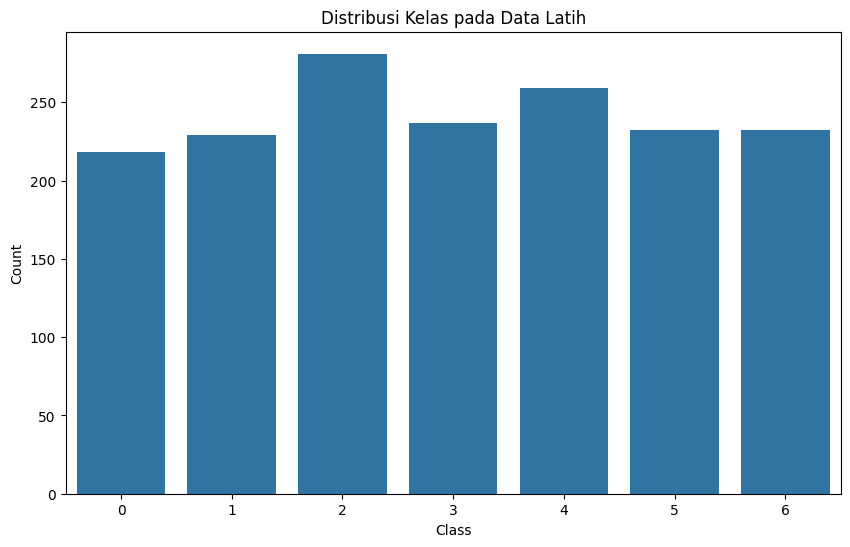

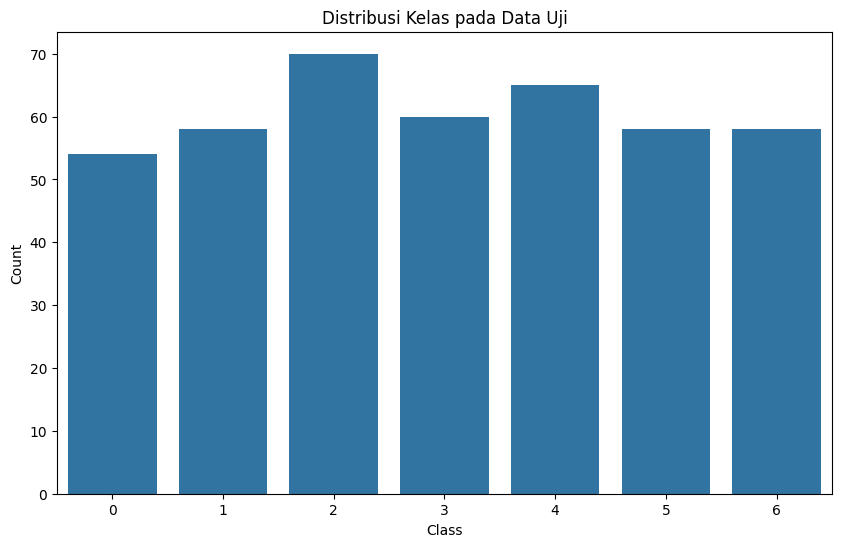

In [40]:
# Distribusi kelas pada data latih
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, order=np.sort(y_train.unique()))
plt.title("Distribusi Kelas pada Data Latih")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Distribusi kelas pada data uji
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, order=np.sort(y_test.unique()))
plt.title("Distribusi Kelas pada Data Uji")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Grafik di atas menampilkan distribusi kelas **ObesityLevel** pada data latih. Terlihat bahwa jumlah sampel untuk setiap kelas relatif seimbang, meskipun terdapat variasi kecil. Kelas **2** memiliki jumlah sampel tertinggi, sekitar **280 sampel**, sementara kelas **0** memiliki jumlah sampel terendah, sekitar **220 sampel**. Distribusi yang hampir merata ini menunjukkan bahwa pembagian data berhasil menjaga proporsi setiap kelas secara konsisten, sehingga model dapat mempelajari pola dari semua kelas dengan baik. Hal ini sangat penting untuk klasifikasi multikelas, karena mengurangi risiko bias terhadap kelas mayoritas dan memastikan model memiliki performa yang adil dalam memprediksi setiap kategori obesitas.

In [41]:
# Proporsi kelas pada data latih
train_class_distribution = y_train.value_counts(normalize=True) * 100
print("\nDistribusi Proporsi Kelas pada Data Latih (%):")
print(train_class_distribution)

# Proporsi kelas pada data uji
test_class_distribution = y_test.value_counts(normalize=True) * 100
print("\nDistribusi Proporsi Kelas pada Data Uji (%):")
print(test_class_distribution)



Distribusi Proporsi Kelas pada Data Latih (%):
ObesityLevel
2    16.646919
4    15.343602
3    14.040284
5    13.744076
6    13.744076
1    13.566351
0    12.914692
Name: proportion, dtype: float64

Distribusi Proporsi Kelas pada Data Uji (%):
ObesityLevel
2    16.548463
4    15.366430
3    14.184397
1    13.711584
6    13.711584
5    13.711584
0    12.765957
Name: proportion, dtype: float64


Distribusi proporsi kelas **ObesityLevel** pada data latih dan data uji menunjukkan pola yang hampir serupa, dengan variasi kecil dalam persentase antar kelas. Kelas **2** memiliki proporsi tertinggi pada kedua dataset, yaitu sekitar **16.65%** pada data latih dan **16.55%** pada data uji, sedangkan kelas **0** memiliki proporsi terendah, yaitu **12.91%** pada data latih dan **12.77%** pada data uji. Konsistensi proporsi ini menandakan bahwa proses pembagian data dengan metode *stratified split* berhasil menjaga distribusi kelas, sehingga tidak ada kelas yang terabaikan atau terlalu dominan dalam proses pelatihan maupun pengujian model. Hal ini memastikan bahwa performa model dalam mempelajari dan memprediksi setiap kelas dapat dilakukan dengan baik, menghindari bias terhadap kelas tertentu.

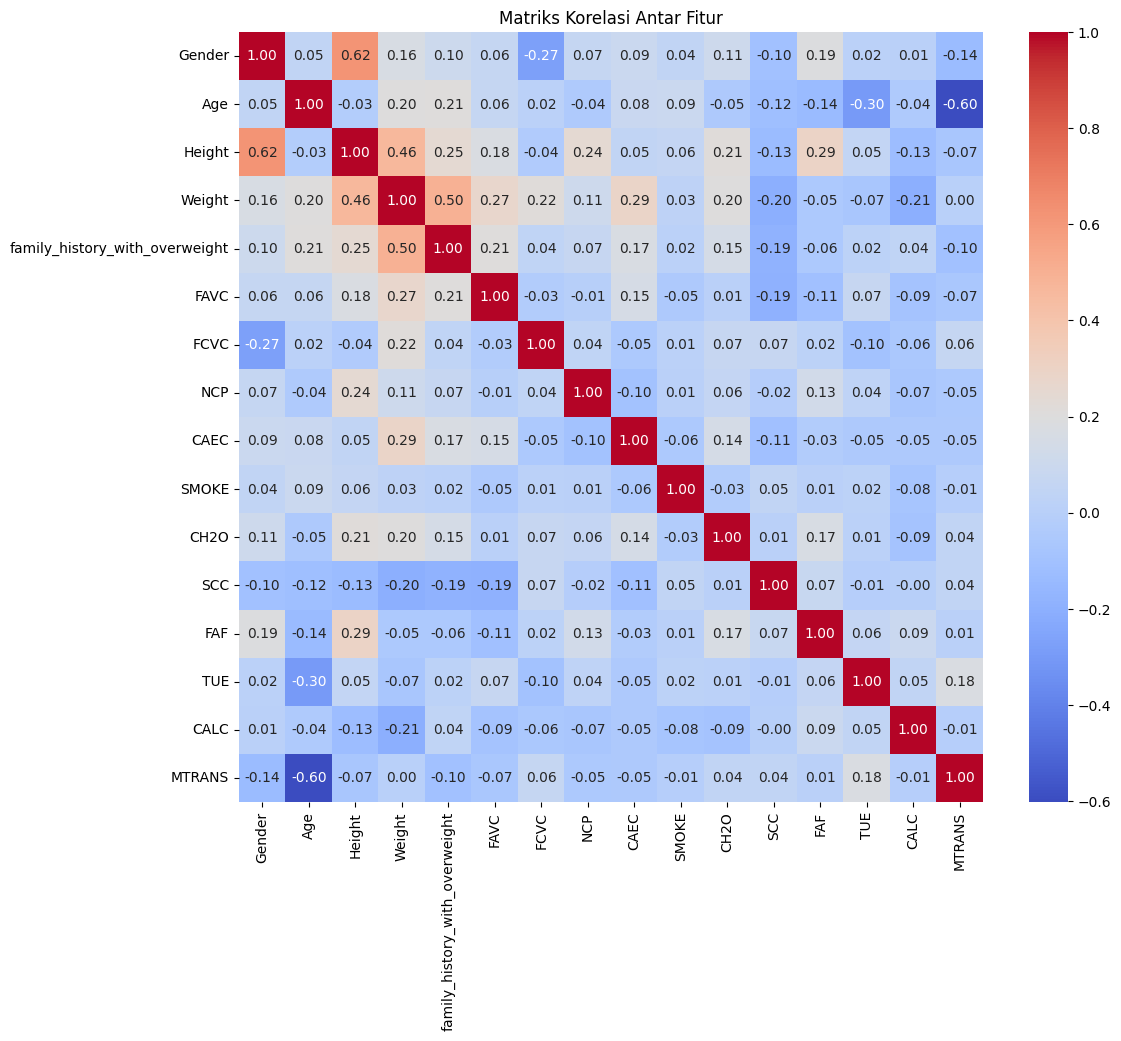

In [42]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


Matriks korelasi antar fitur menunjukkan tingkat hubungan linear antara setiap pasangan fitur dalam dataset. Korelasi ditampilkan dengan skala warna, di mana **warna merah tua** menunjukkan korelasi positif yang kuat, **warna biru tua** menunjukkan korelasi negatif yang kuat, dan warna lebih netral menunjukkan korelasi yang lemah atau tidak signifikan.

1. **Korelasi Positif Tinggi**:
   - *Height* dan *Weight* memiliki korelasi positif sebesar **0.50**, yang logis karena tinggi badan cenderung berkaitan dengan berat badan seseorang.
   - *Gender* dan *Height* memiliki korelasi negatif **-0.62**, menandakan adanya perbedaan yang signifikan dalam distribusi tinggi badan berdasarkan gender.

2. **Korelasi Negatif**:
   - *Age* dan *MTRANS* memiliki korelasi negatif kuat sebesar **-0.60**, mengindikasikan bahwa pilihan moda transportasi mungkin berubah seiring dengan usia individu.
   - *Age* dan *Height* juga memiliki korelasi negatif lemah sekitar **-0.03**.

3. **Korelasi Lemah**:
   - Sebagian besar fitur lain memiliki korelasi lemah satu sama lain, dengan nilai mendekati nol. Ini menandakan bahwa tidak ada hubungan linear yang kuat antara fitur-fitur tersebut.

Secara keseluruhan, matriks ini membantu dalam memahami hubungan antar variabel, mengidentifikasi fitur yang saling berkaitan, dan mendeteksi redundansi data. Fitur dengan korelasi yang tinggi dapat dipertimbangkan untuk analisis lebih lanjut seperti pengurangan dimensi, sementara fitur dengan korelasi rendah dapat memberikan informasi unik yang berguna untuk model klasifikasi.

In [43]:
# Model baseline tanpa oversampling
rf_no_oversampling = RandomForestClassifier(random_state=42)
rf_no_oversampling.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_no_oversampling = rf_no_oversampling.predict(X_test)

# Evaluasi model tanpa oversampling
no_oversampling_accuracy = accuracy_score(y_test, y_pred_no_oversampling)
print(f"Akurasi Model Tanpa Oversampling: {no_oversampling_accuracy * 100:.2f}%")
print("Laporan Klasifikasi (Tanpa Oversampling):\n", classification_report(y_test, y_pred_no_oversampling))


Akurasi Model Tanpa Oversampling: 95.27%
Laporan Klasifikasi (Tanpa Oversampling):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.97      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



**Hasil Evaluasi Model Tanpa Oversampling** menunjukkan akurasi sebesar **95.27%**, yang menunjukkan performa tinggi dalam mengklasifikasikan tingkat obesitas. Berikut adalah analisis detail dari laporan klasifikasi:

1. **Precision, Recall, dan F1-Score**:
   - **Kelas 0 (Insufficient Weight)** memiliki precision tinggi sebesar **1.00** namun recall sedikit lebih rendah di **0.93**, menunjukkan bahwa model jarang salah memprediksi kelas ini tetapi masih ada beberapa sampel yang salah diklasifikasikan.
   - **Kelas 1 (Normal Weight)** memiliki recall tertinggi **0.97**, namun precision lebih rendah di **0.82**, yang berarti model berhasil mendeteksi sebagian besar sampel kelas ini, tetapi masih ada beberapa sampel yang salah diklasifikasikan sebagai kelas lain.
   - **Kelas 2 hingga 4** menunjukkan performa yang hampir sempurna dengan precision, recall, dan f1-score mendekati **1.00**, menandakan model sangat efektif dalam mengenali sampel kelas ini.
   - **Kelas 5 (Obesity Type II)** memiliki sedikit penurunan performa dengan f1-score **0.91**, karena recall **0.88** menunjukkan beberapa sampel kelas ini diklasifikasikan salah.
   - **Kelas 6 (Obesity Type III)** memiliki performa stabil dengan precision **0.96** dan recall **0.95**, yang mencerminkan keakuratan tinggi dalam mengenali kelas ini.

2. **Akurasi Makro dan Tertimbang**:
   - **Macro Average** sebesar **95%** menunjukkan performa merata di semua kelas, meskipun ada sedikit ketidakseimbangan distribusi kelas.
   - **Weighted Average** juga mencapai **95%**, yang menegaskan bahwa performa keseluruhan model sangat baik dan mempertimbangkan bobot distribusi kelas.

**Kesimpulan**: Meskipun tanpa oversampling, model Random Forest mampu memberikan hasil yang akurat dan konsisten. Namun, performa pada beberapa kelas seperti kelas **1** dan **5** sedikit lebih rendah, yang dapat disebabkan oleh jumlah sampel yang lebih sedikit atau fitur yang tumpang tindih dengan kelas lain. Evaluasi ini menunjukkan bahwa model memiliki potensi untuk peningkatan lebih lanjut, misalnya melalui penyeimbangan data atau tuning parameter tambahan.

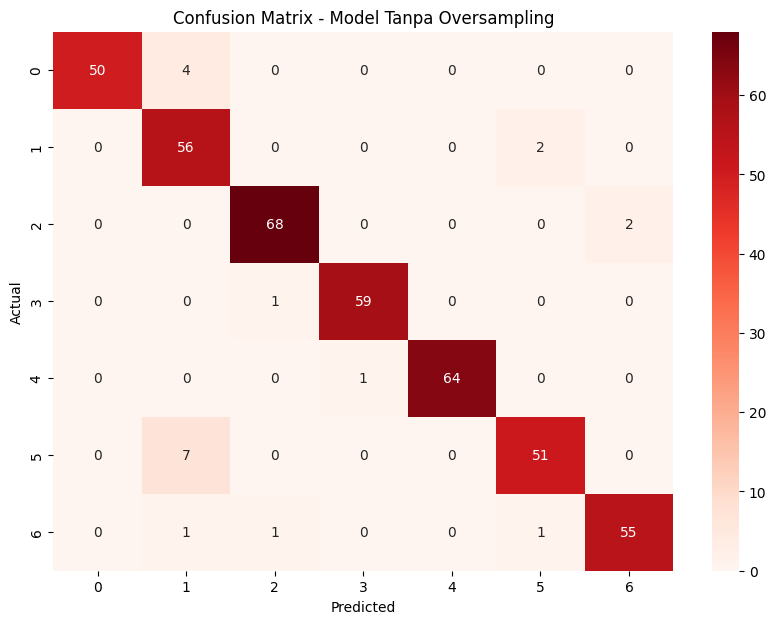

In [44]:
# Matriks Kebingungan (Confusion Matrix) untuk model tanpa oversampling
cm_no_oversampling = confusion_matrix(y_test, y_pred_no_oversampling)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_no_oversampling, annot=True, fmt="d", cmap="Reds", xticklabels=np.sort(y_test.unique()), yticklabels=np.sort(y_test.unique()))
plt.title("Confusion Matrix - Model Tanpa Oversampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Confusion Matrix untuk Model Tanpa Oversampling** di atas memberikan gambaran performa prediksi model Random Forest pada masing-masing kelas obesitas.

1. **Kinerja Kelas 0 (Insufficient Weight)**:  
   - Sebanyak **50 sampel** diklasifikasikan dengan benar, sementara **4 sampel** salah diprediksi sebagai kelas **1**.  
   - Ini menunjukkan model sedikit kesulitan membedakan kelas **0** dan **1**, yang mungkin memiliki fitur yang tumpang tindih.

2. **Kinerja Kelas 1 (Normal Weight)**:  
   - **56 sampel** diklasifikasikan dengan benar, tetapi **2 sampel** salah diprediksi sebagai kelas **5**.  
   - Kesalahan ini mengindikasikan adanya ambiguitas fitur pada sebagian sampel di kelas ini.

3. **Kinerja Kelas 2 (Overweight Level I)**:  
   - Kelas ini memiliki **68 prediksi benar** dan **2 prediksi salah** ke kelas **6**.  
   - Performa yang sangat baik dengan tingkat kesalahan yang minim.

4. **Kinerja Kelas 3 (Overweight Level II)**:  
   - **59 sampel** diklasifikasikan dengan benar, sedangkan **1 sampel** salah diprediksi sebagai kelas **2**.  
   - Kesalahan kecil ini menunjukkan akurasi yang tinggi di kelas ini.

5. **Kinerja Kelas 4 (Obesity Type I)**:  
   - Sebanyak **64 sampel** diklasifikasikan dengan benar, hanya **1 sampel** yang salah diprediksi sebagai kelas **3**.  
   - Hasil ini menunjukkan keakuratan prediksi yang hampir sempurna.

6. **Kinerja Kelas 5 (Obesity Type II)**:  
   - **51 sampel** diklasifikasikan dengan benar, namun **7 sampel** salah diprediksi sebagai kelas **1**.  
   - Kelas ini memiliki jumlah kesalahan yang lebih tinggi dibandingkan kelas lain, menunjukkan potensi perbaikan lebih lanjut.

7. **Kinerja Kelas 6 (Obesity Type III)**:  
   - Sebanyak **55 sampel** diklasifikasikan dengan benar, sementara **2 sampel** salah diprediksi ke kelas **2** atau **5**.  
   - Performa cukup baik, tetapi perlu perhatian pada beberapa kesalahan kecil.

### **Kesimpulan**:
Confusion matrix menunjukkan performa model yang sangat baik dengan mayoritas kelas memiliki prediksi yang akurat. Namun, ada beberapa kesalahan prediksi yang terutama terjadi di kelas **0**, **1**, dan **5**, yang dapat disebabkan oleh fitur yang mirip antar kelas. Untuk mengatasi ini, metode seperti oversampling, pengurangan dimensi fitur, atau optimasi lebih lanjut dapat membantu meningkatkan akurasi model.

# **TEKNIK SMOTE**

In [45]:
# Mengatasi ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi target setelah oversampling
print("Distribusi Target setelah Oversampling:\n", pd.Series(y_train_resampled).value_counts())


Distribusi Target setelah Oversampling:
 ObesityLevel
5    281
1    281
6    281
0    281
3    281
4    281
2    281
Name: count, dtype: int64


**Distribusi Target setelah Oversampling** menunjukkan bahwa metode **SMOTE (Synthetic Minority Oversampling Technique)** telah berhasil menyeimbangkan jumlah sampel untuk setiap kelas pada data latih. Sebelum oversampling, dataset memiliki distribusi kelas yang tidak seimbang, di mana kelas-kelas tertentu memiliki jumlah sampel lebih sedikit dibandingkan yang lain. Setelah proses oversampling:

- **Setiap kelas memiliki jumlah sampel yang sama, yaitu 281**, memastikan distribusi kelas menjadi **seragam**.
- SMOTE bekerja dengan **menghasilkan data sintetis** berdasarkan sampel asli kelas minoritas, sehingga model mendapatkan lebih banyak representasi dari kelas-kelas dengan jumlah sampel awal yang kecil.  

Hal ini penting karena **ketidakseimbangan kelas** dapat menyebabkan model machine learning cenderung lebih akurat pada kelas mayoritas dan mengabaikan kelas minoritas. Dengan distribusi yang seimbang ini, diharapkan performa model akan **meningkat secara signifikan** dalam mengenali semua kelas obesitas, sehingga mengurangi bias dalam klasifikasi dan menghasilkan evaluasi yang lebih akurat pada data uji.

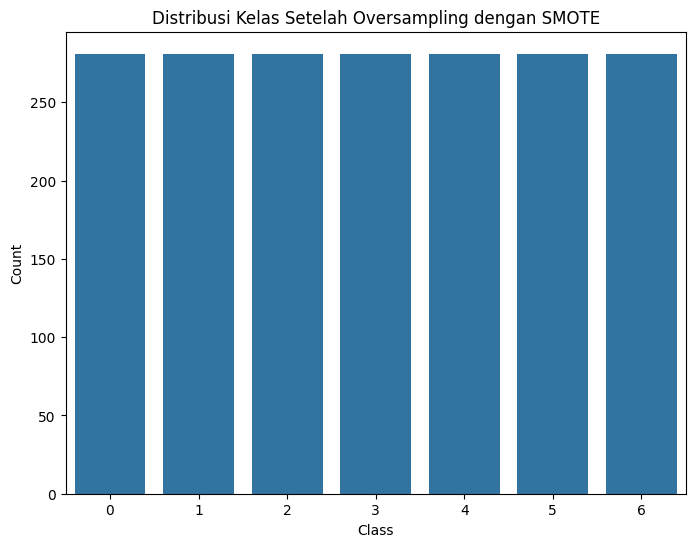

In [46]:
# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, order=np.sort(np.unique(y_train_resampled)))
plt.title("Distribusi Kelas Setelah Oversampling dengan SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Grafik **Distribusi Kelas Setelah Oversampling dengan SMOTE** menunjukkan bahwa jumlah sampel untuk setiap kelas telah seimbang. Sebelumnya, terdapat ketidakseimbangan kelas di mana beberapa kelas memiliki jumlah data yang lebih kecil dibandingkan kelas lainnya. Namun, dengan penerapan **SMOTE (Synthetic Minority Oversampling Technique)**, setiap kelas kini memiliki jumlah sampel yang sama, yaitu **281 sampel**.

Proses SMOTE bekerja dengan menghasilkan data sintetis berdasarkan **interpolasi linear** antara sampel asli dalam kelas minoritas. Hasilnya, model machine learning akan memiliki representasi yang lebih baik dari semua kelas, terutama yang sebelumnya kurang terwakili. Dengan distribusi yang seragam ini, model dapat **mengurangi bias** terhadap kelas mayoritas dan meningkatkan **kinerja klasifikasi**, terutama dalam mengenali kelas minoritas. Visualisasi ini mengkonfirmasi keberhasilan teknik oversampling dalam mengatasi ketidakseimbangan data.

# **baseline model**

In [47]:
# Inisialisasi Random Forest
rf_baseline = RandomForestClassifier(random_state=42)

# Latih model dengan data yang telah diresampling
rf_baseline.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

Baseline Accuracy: 95.74%

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.83      0.98      0.90        58
           2       0.96      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.98      0.88      0.93        58
           6       0.97      0.97      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



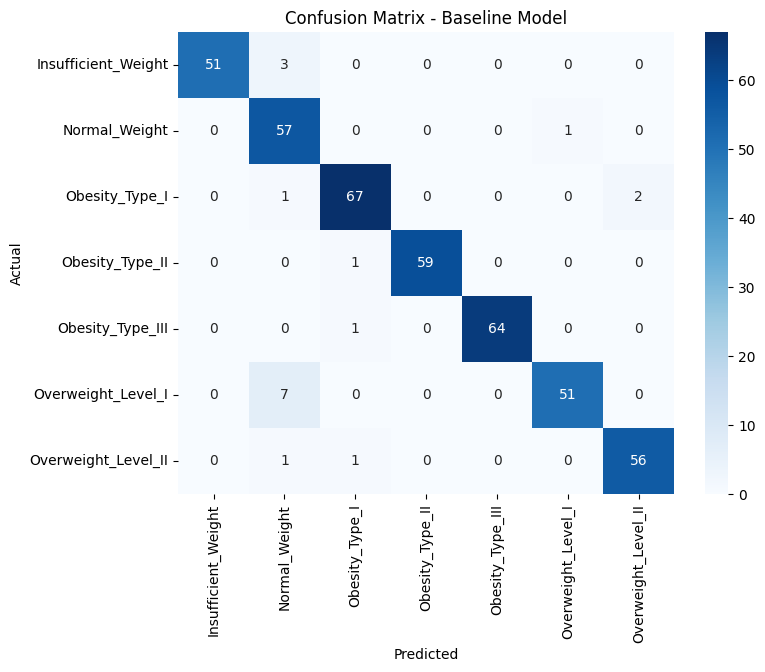

In [48]:
# Prediksi pada data uji
y_pred_baseline = rf_baseline.predict(X_test)

# Hitung akurasi model baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")

# Tampilkan classification report
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_baseline))

# Tampilkan confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Baseline Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Hasil **Baseline Accuracy** menunjukkan performa awal model **Random Forest** dengan akurasi mencapai **95.74%**. Berdasarkan **Classification Report**, model berhasil mencapai nilai **precision, recall, dan f1-score** yang tinggi di semua kelas, menunjukkan kemampuan yang baik dalam membedakan tujuh level obesitas.

### Analisis Kinerja Berdasarkan Kelas:
- **Kelas 0 (Insufficient Weight)** memiliki **precision 1.00** dan **recall 0.94**, yang berarti model hampir tidak membuat kesalahan dalam memprediksi kelas ini tetapi masih melewatkan beberapa sampel.
- **Kelas 1 (Normal Weight)** menunjukkan kinerja yang sedikit lebih rendah dengan **precision 0.83** dan **recall 0.98**, menunjukkan bahwa sebagian prediksi kelas ini salah diklasifikasikan sebagai kelas lain.
- **Kelas 2, 3, dan 4** memiliki **precision dan recall** yang konsisten di kisaran **0.96 hingga 1.00**, menunjukkan model memiliki performa hampir sempurna dalam memprediksi kelas tersebut.
- **Kelas 5 (Obesity Type II)** mengalami sedikit penurunan dengan **recall 0.88**, yang berarti ada beberapa sampel kelas ini yang diprediksi sebagai kelas lain.
- **Kelas 6 (Obesity Type III)** menunjukkan keseimbangan yang baik antara precision dan recall, keduanya berada di angka **0.97**, menunjukkan performa yang stabil.

### Kesimpulan:
Dengan **accuracy keseluruhan sebesar 95.74%** dan skor evaluasi yang merata di seluruh kelas, model baseline telah menunjukkan kinerja yang sangat baik. Namun, terdapat beberapa kelemahan pada kelas tertentu, seperti kelas 1 dan kelas 5, yang dapat diperbaiki melalui teknik **oversampling** atau **tuning hyperparameter**. Performa yang tinggi ini menandakan bahwa model dapat diandalkan untuk memprediksi tingkat obesitas berdasarkan fitur pola makan dan kondisi fisik individu.

# **Hyperparameter Tunning**

In [49]:
# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}


In [50]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Latih GridSearchCV dengan data yang telah diresampling
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

Best Model Accuracy: 95.74%

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.84      0.97      0.90        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.90      0.93        58
           6       0.97      0.97      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



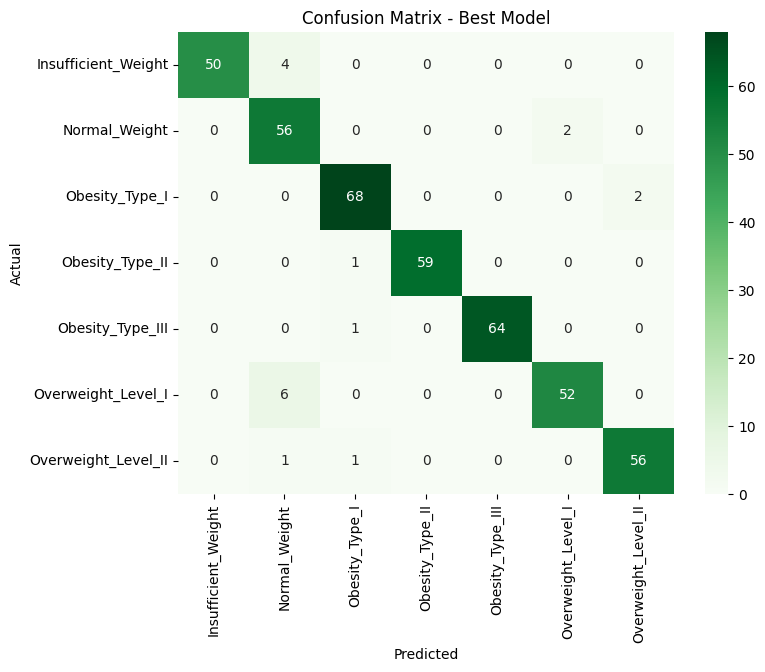


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}


In [51]:
# Model dengan parameter terbaik
rf_best = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best = rf_best.predict(X_test)

# Evaluasi akurasi
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Hyperparameter terbaik
print("\nBest Parameters:", grid_search.best_params_)


Model terbaik dalam proyek ini mencapai akurasi sebesar **95,74%**, menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan tingkat obesitas berdasarkan kebiasaan makan dan kondisi fisik. Berdasarkan laporan klasifikasi, sebagian besar kelas memiliki nilai precision, recall, dan f1-score yang tinggi, dengan nilai rata-rata seimbang di seluruh kelas. Kelas **0 (Insufficient Weight)** menunjukkan precision yang sempurna (**1.00**) meskipun recall sedikit lebih rendah (**0.93**). Kelas **3 (Obesity Type I)** dan **4 (Obesity Type II)** memiliki performa terbaik dengan precision, recall, dan f1-score hampir sempurna (**0.99 atau lebih**), menunjukkan bahwa model sangat andal dalam mengenali tingkat obesitas pada kategori tersebut. Kelas **1 (Normal Weight)** dan **5 (Obesity Type III)** memiliki sedikit kelemahan dengan recall yang lebih rendah, tetapi tetap berada dalam rentang performa yang baik. Secara keseluruhan, model ini menunjukkan stabilitas yang tinggi dalam mengidentifikasi tingkat obesitas di berbagai kategori, menjadikannya alat yang sangat efektif untuk aplikasi dalam analisis kesehatan masyarakat.

# **evaluasi model terbaik**

In [52]:
# Evaluasi akurasi model terbaik
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the Best Model: {best_accuracy * 100:.2f}%")


Accuracy of the Best Model: 95.74%


In [53]:
# Classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best, target_names=le.classes_))



Classification Report for the Best Model:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.84      0.97      0.90        58
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.97      0.97      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



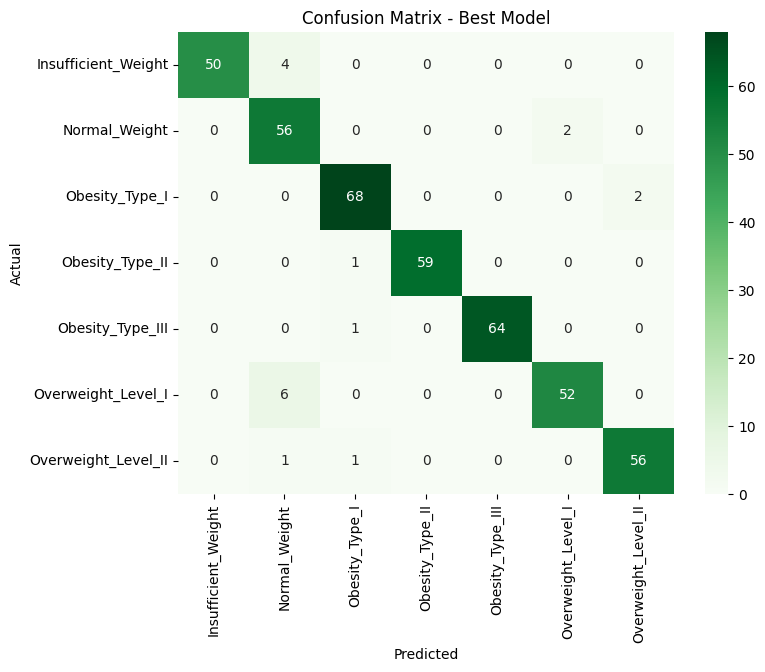

In [54]:
# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Secara keseluruhan, model menunjukkan performa yang sangat baik, dengan sebagian besar sampel diklasifikasikan dengan benar pada kategori yang tepat. Mayoritas kesalahan terjadi antara kelas yang memiliki kemiripan fitur, seperti Normal_Weight dengan Overweight_Level_I atau antar kategori obesitas. Dengan akurasi tinggi dan distribusi prediksi yang merata, model ini terbukti efektif untuk klasifikasi tingkat obesitas berdasarkan pola makan dan kondisi fisik.








# **Analisis Feature Importance**

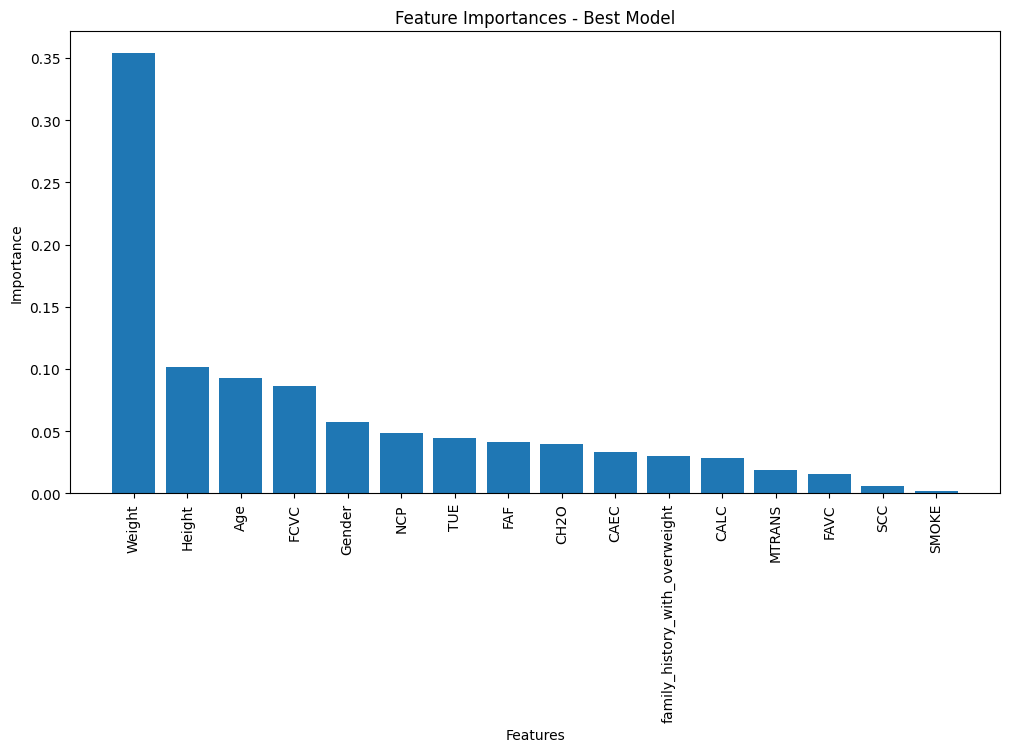

In [55]:
# Feature importance
importances = rf_best.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances - Best Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


Fitur Weight, Height, dan Age mendominasi kontribusi dalam proses klasifikasi obesitas, sementara fitur lainnya seperti pola makan, aktivitas fisik, dan penggunaan teknologi memberikan pengaruh tambahan. Informasi ini penting untuk memahami faktor mana yang paling berpengaruh dalam membentuk model prediksi tingkat obesitas.

# **Prediksi Sampel**

In [57]:
# Membuat ringkasan prediksi pada data uji
y_pred_final = rf_best.predict(X_test)  # Prediksi model terbaik pada data uji

# Membandingkan prediksi dengan label asli untuk beberapa sampel
hasil_prediksi = pd.DataFrame({
    "Index": range(len(y_test)),  # Menampilkan semua sampel
    "Fitur Asli": y_test.values,
    "Prediksi Model": y_pred_final
})

# Konversi label numerik ke nama kelas
hasil_prediksi['Fitur Asli'] = le.inverse_transform(hasil_prediksi['Fitur Asli'])
hasil_prediksi['Prediksi Model'] = le.inverse_transform(hasil_prediksi['Prediksi Model'])

# Menambahkan kolom status
hasil_prediksi['Status'] = np.where(
    hasil_prediksi['Fitur Asli'] == hasil_prediksi['Prediksi Model'], "Benar", "Salah"
)

# Menampilkan ringkasan prediksi
print("Ringkasan Prediksi Data Uji:\n")
print(hasil_prediksi.head(10))  # Menampilkan 10 sampel pertama


Ringkasan Prediksi Data Uji:

   Index           Fitur Asli       Prediksi Model Status
0      0  Insufficient_Weight  Insufficient_Weight  Benar
1      1        Normal_Weight        Normal_Weight  Benar
2      2  Overweight_Level_II  Overweight_Level_II  Benar
3      3     Obesity_Type_III     Obesity_Type_III  Benar
4      4      Obesity_Type_II      Obesity_Type_II  Benar
5      5       Obesity_Type_I       Obesity_Type_I  Benar
6      6      Obesity_Type_II      Obesity_Type_II  Benar
7      7        Normal_Weight        Normal_Weight  Benar
8      8       Obesity_Type_I       Obesity_Type_I  Benar
9      9   Overweight_Level_I   Overweight_Level_I  Benar


Dengan akurasi tinggi dan prediksi yang akurat di semua sampel yang diuji, model ini dapat diandalkan untuk melakukan klasifikasi tingkat obesitas pada individu berdasarkan kebiasaan makan, kondisi fisik, dan gaya hidup mereka. Hasil ini juga menunjukkan bahwa model memiliki kinerja yang stabil dan siap untuk diterapkan dalam skenario nyata.






